In [2]:
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data[:,2:]
y=iris.target
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[:2],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)


In [17]:
import pydot
graph=pydot.graph_from_dot_file('iris_tree.dot')
graph[0].write_png('iris_tree.png')

In [16]:
graph[0]

# 7

In [62]:
from sklearn.datasets import make_moons
moons=make_moons(n_samples=1000,noise=0.4)
X=moons[0]
y=moons[1]
data=np.hstack((X,y.reshape(-1,1)))
data

array([[ 0.28637078, -0.36384327,  1.        ],
       [ 2.1080606 ,  0.24220044,  1.        ],
       [-0.36054371,  1.08652955,  0.        ],
       ...,
       [ 1.79471841, -0.4332813 ,  1.        ],
       [ 1.39458307, -0.8412466 ,  1.        ],
       [-0.43081013, -0.11262923,  1.        ]])

In [52]:
X.shape,y.shape

((1000, 2), (1000,))

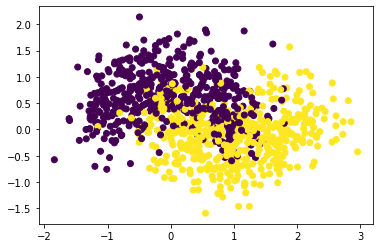

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x=moons[0][:,0],y=moons[0][:,1],c=moons[1])

In [63]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)
X_train=train_set[:,0:2]
y_train=train_set[:,2]

In [86]:
X_test=test_set[:,0:2]
y_test=test_set[:,2]

In [72]:
X_train.shape,y_train.shape

((800, 2), (800,))

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
cross_val_score(clf,X_train,y_train,cv=5)

array([0.875  , 0.8125 , 0.8125 , 0.80625, 0.84375])

In [ ]:
export_graphviz

In [76]:
from sklearn.model_selection import GridSearchCV,cross_val_score
params={
    'max_leaf_nodes':list(range(2,100)),
    'min_samples_split':[2,3,4]
}
grid_search=GridSearchCV(clf,params,n_jobs=-1,cv=5,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [77]:
grid_search.best_score_

0.86875

In [78]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 8

In [85]:
from sklearn.model_selection import ShuffleSplit
n_trees=1000
n_instances=100
mini_sets=[]
rs=ShuffleSplit(n_splits=n_trees,test_size=len(X_train)-n_instances)
for mini_train_index,mini_test_index in rs.split(X_train):
    X_mini_train=X_train[mini_train_index]
    y_mini_train=y_train[mini_train_index]
    mini_sets.append([X_mini_train,y_mini_train])

In [92]:
from sklearn.base import clone
forest=[clone(grid_search.best_estimator_) for _ in range(n_trees)]
accuracy_scores=[]
Y_pred=np.zeros((n_trees,2))

for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred=tree.predict(X_test)
    acc=np.array([y_pred==y_test]).mean()
    accuracy_scores.append(acc)
np.array(accuracy_scores).mean()

0.8397049999999999

In [93]:
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.])

In [89]:
np.array([1,2,3]).mean()

2.0